# Review and Validate HunFlair: The State-of-the-Art Named Entity Recongnition(NER) for Biomedical Texts 

Keonghwan Oh(ko938), Flavjo Xhelollari(fx2078)

## Background


Named Entity Recognition (NER) aims to categorize and identiy the nouns from the the text. It recognize and extract from the text and classify thema based one the predefined semantic types such as person, location, organization etc [1]. It also helps to locate the profer nouns in a text. The selected named entities carry key information which can be applied for language processing applications [2]. Highly accurate NER also can be used for the nature language processing (NLP) as a key source information. It helps a lots of fields such as information searching and summurization, answering the questions based on the database[3]. Especially, it improves the quality of the machine translation (MT) and it guides to the user to get profer translations results.

<center><img width=800 src="https://drive.google.com/uc?id=1hJlB7qOMBy8bsv40Bsn9xzbMu_YlwNe8"/>

***Figure 1. Example of generic NER***</center>

The named entity can be sorted as two parts. One is generic named entities (GNT) and domain-specific named entities (DNE) are the other type. GNT is the entities with common classficication such as names(person), location etc. DNE is the named entities with special terms from specific topics such as neuroscience words from biomedical fields, wireless power transmission from electrical engineering fields and so on. Figure 2 is the example of domain-specific named entity with biomedical NER with covid-19 corpus. 

One of the domain-specific named entity recognition (NER), biomedical text mining, is an important task used to extract information from biomedical texts from journal or articles[4]. Especially, biomedical entitiy(i.e. genes, chemicals or diseases) recognitionss in unstructured scientific text is mandatry step for extracting the biomedical informations. Needs on the biomedical NER has been rised due to the rapid development of biomedical research which the number of the documents increases with exponential growth[5]. These trends affected to the scientiest who are engaged in biomedical fields to follow the pace with the state-of-the-art researches. Addtionally, the needs of the effective with high accuracy natural language processing (NLP) tools to help manage, organize and retrieve the biomedical information.  

<center><img width=800 src="https://drive.google.com/uc?id=17QxG6_js0UbZbag-xCN5VK3qOOpr4Kcq"/>

***Figure 2. Example of Biomedical NER with Covid-19 corpus***[7]</center>

These needs accelerated to develop the Biomedical NER from the lot of research groups. SciSpacy, which is one of the fast and robust model for NLP has been released in 2019[5]. The HUNER tagger[8] also released in the same year which was trained on a large collection of biomedical NER dataset. This model leads to a higher performace on unseen corpora compared to the model trained on a single corpus. However, this model is not able to connect to any of the major NLP frameworks for further processings because it relies on a Docker installation which are the client-server architecture. Therefore, they suggested the new model, HunFlair, which relies on the Flair NLP architechture, which is on of the easy to use NLP framework(Akbik et al., 2019) [9] which is fast with high accuracy on biomedical NER.

The HunFlair, they train, evaluate and make available models for five entity types such as Cell Line, Chemical, Disease, Gene and Species. Technically, the models bring and combine the insight from the HUNER Tagger[8] and it has done the joint triaing on multiple gold standart copora such as fastText. 

**Technically, the models combine the insights from Weber et al. (2019) and Akbik et al. (2019) by merging character-level pretraining and joint training on multiple gold standard corpora, which leads to strong gains over other state-of-the-art standalone NER tools. Integration into Flair adds very simple usage even for non-experts: HunFlair can be installed with a single command and applied with only a few lines of code. Additionally, we integrate 23 biomedical NER corpora into HunFlair using a consistent format, which enables researchers and practitioners to rapidly train their own models and experiment with new approaches.**

<center><img width=800 src="https://drive.google.com/uc?id=1goMocMzuqb9eUzv0kkREFUGgvnF56ChD"/>

***Figure 3. Overview of the HunFlair (a) Traing Model (b) Installation and application code (c) sample application with annotated output***</center>



## Code Explanation

First of all, the Flair Library is a well-established library, which covers a lot of aspects and offers a wide variety of functionality. For the purpose of this project, we will focus on HunFlair, which is a based on Flair library. HunFlair is trained 31 biomedical NER datasets. The code comes from the official [HunFlair](https://github.com/flairNLP/flair/blob/master/resources/docs/HUNFLAIR.md).

Below, we are introducing a step-by-step set of tutorials that cover a lot of functionalities of the library (HunFlair), but we will also include a comprehensive tutorial on Flair library itself.

In [ ]:
""" Quick Tutorial on Flair"""
%pip install flair

In [ ]:
# Flair library has two types of objects that are essential : Sentence & Token
# Sentence is a text: a list of Token
# Example: 
from flair.data import Sentence
sentence = Sentence('The grass is green.')
print(sentence)

# Now the sentence is built based on tokens. This is very similar to a list 
# and can be accessed as below:
for token in sentence:
    print(token)

# Each token in a sentence can be labeled. For example
sentence[3].set_label('ner','color')
# Now the output of the sentence will change
print(sentence)

# We can work on the label of the tokens
token = sentence[3]
print(token)
label = token.get_label('ner')
print(f'token.text is: "{token.text}"')
print(f'token.idx is: "{token.idx}"')
print(f'label.value is: "{label.value}"')
print(f'label.score is: "{label.score}"')

# We can add label to a sentence 
sentence = Sentence('Morocco will win the world cup 2022')
sentence.add_label('topic', 'sports')
print(sentence)

# Note that the token prints out the confidentiality on the correct label

In [ ]:
# Now we deal with another important part of the library: Tagging
# We can use pre-trained sequence tagging models

from flair.models import SequenceTagger
tagger = SequenceTagger.load('ner')

# Now use predict() on a sentence 
from flair.data import Sentence
sentence = Sentence('George Washington went to Washington.')
# Here we see the confidentiality of the pre-trained model on the labels of 
# the sentence.
for entity in sentence.get_spans('ner'):
    print(entity)

In [ ]:
# An interesting option is to use Multi-Tagging: predict several types of 
# annotation at once. 

from flair.models import MultiTagger
tagger = MultiTagger.load(['pos', 'ner'])

sentence = Sentence("George Washington went to Washington.")
tagger.predict(sentence)
print(sentence)

# This prints out the annotations for all tokens
# There are several pre-trained tagger models, such as:
# ner, ner-fast, ner-large, chunk, pos, pos-fast, upos, frame (English-only)


In [ ]:
# Semantic Frame Detection - used to distinct between several meanings of tokens
# load model
tagger = SequenceTagger.load('frame')

# make English sentence
sentence = Sentence('George returned to Berlin to return his hat.')

# predict NER tags
tagger.predict(sentence)

# go through tokens and print predicted frame (if one is predicted)
for token in sentence:
    print(token)

In [ ]:
# We can tag a list of sentences, which is known as "CORPUS"
from flair.models import SequenceTagger
from flair.tokenization import SegtokSentenceSplitter
# example text with many sentences
text = "This is a sentence. This is another sentence. I love Berlin."
# initialize sentence splitter
splitter = SegtokSentenceSplitter()
# use splitter to split text into list of sentences
sentences = splitter.split(text)
# predict tags for sentences
tagger = SequenceTagger.load('ner')
tagger.predict(sentences)
# iterate through sentences and print predicted labels
for sentence in sentences:
    print(sentence)

In [ ]:
# Text Classification Model
from flair.models import TextClassifier
# load tagger
classifier = TextClassifier.load('sentiment')
# make example sentence
sentence = Sentence("enormously entertaining for moviegoers of any age.")
# call predict
classifier.predict(sentence)
# check prediction
print(sentence)
# This indicates that this sentence has positive sentiment.

In [ ]:
# Embedding WORDS
# Usually Flair uses 'FastText' or 'GloVe' for small models.
# The Flair Embedding: trains without explicit notion of words, and they're 
# contextualized.

from flair.embeddings import FlairEmbeddings
# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')
# create a sentence
sentence = Sentence('The grass is green .')
# embed words in sentence
flair_embedding_forward.embed(sentence)
# Note that stacked embedding is a powerful tool to combine different embeddings
# in order to give the best results. (REF: tutorial 3)

In [ ]:
# Embedding DOCUMENTS
# It gives one embedding for all the text. There are 4 main doc Flair embed

# DocumentPoolEmbeddings : simple average over all word embedds in the sentence.
# No need to train, use directly. 
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings
#        initialize the word embeddings
glove_embedding = WordEmbeddings('glove')
#        initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])
from flair.data import Sentence
#        create an example sentence
sentence = Sentence('The grass is green . And the sky is blue .')
#        embed the sentence with our document embedding
document_embeddings.embed(sentence)
#        now check out the embedded sentence.
print(sentence.embedding)

# Note that some of the other embeddings methods are 
# DocumentRNNEmbeddings  (train an RNN over all word embeddings in a sentence)
# TransformerDocumentEmbeddings (use pre-trained transformers; recommended)
# SentenceTransformerDocumentEmbeddings (recommended if data vectorized)

In [ ]:
# To work with a classification dataset yourself, you can use csv files, or use
# FastText format.
# this is the folder in which train, test and dev files reside
from flair.data import Corpus
from flair.datasets import ClassificationCorpus

data_folder = '/path/to/data/folder'

# load corpus by pointing to folder. Train, dev and test gets identified automatically.
corpus: Corpus = ClassificationCorpus(data_folder,
                                      label_type='topic',
                                      )

### Not executable, just a sample

In [ ]:
# Now we move to the core part of the code: Working with HUNFLAIR
from flair.models import MultiTagger
tagger = MultiTagger.load("hunflair")

from flair.data import Sentence
sentence = Sentence("Behavioral abnormalities in the Fmr1 KO2 Mouse Model of Fragile X Syndrome")
# predict NER tags
tagger.predict(sentence)
# print sentence with predicted tags
print(sentence.to_tagged_string())

for annotation_layer in sentence.annotation_layers.keys():
    for entity in sentence.get_spans(annotation_layer):
        print(entity)

In [ ]:
# Biomedical Tokenizer 
%pip install scispacy==0.2.5 # GIVING ME SOME HARD TIME
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_sm-0.2.5.tar.gz # IMPORTANT

from flair.tokenization import SciSpacyTokenizer

sentence = Sentence("Behavioral abnormalities in the Fmr1 KO2 Mouse Model of Fragile X Syndrome",
                    use_tokenizer=SciSpacyTokenizer())

In [ ]:
# If we want to work with longer texts, we need to split it into sentences.
from flair.tokenization import SciSpacySentenceSplitter
abstract = "Fragile X syndrome (FXS) is a developmental disorder caused by a mutation in the X-linked FMR1 gene, " \
           "coding for the FMRP protein which is largely involved in synaptic function. FXS patients present several " \
           "behavioral abnormalities, including hyperactivity, anxiety, sensory hyper-responsiveness, and cognitive " \
           "deficits. Autistic symptoms, e.g., altered social interaction and communication, are also often observed: " \
           "FXS is indeed the most common monogenic cause of autism."
# initialize the sentence splitter
splitter = SciSpacySentenceSplitter()

# split text into a list of Sentence objects
sentences = splitter.split(abstract)

# you can apply the HunFlair tagger directly to this list
tagger.predict(sentences)
for sentence in sentences:
    print(sentence.to_tagged_string())

In [ ]:
# load the model you trained
model = SequenceTagger.load("taggers/ncbi-disease/best-model.pt")

# create example sentence
from flair.data import Sentence
sentence = Sentence("Women who smoke 20 cigarettes a day are four times more likely to develop breast cancer.")

# predict tags and print
model.predict(sentence)

print(sentence.to_tagged_string())

# Claim Validation - NER on NCBI corpus: HunFlair vs BioBERT

The paper claims that HunFlair is an easy to use tool, that performs very well when it comes to different tasks. It is pre-trained on a huge amount of data, and it is very robust. This makes HunFlair able to outperform the state-of-the-art models on any NLP task. We came accross some results on the NCBI Disease, and in this case HunFlair failed to outperform one of its competitors: BioBERT. This drew my attention, and that is why we decided to work on proving that biomedical NER on NCBI-disease corpus with BioBERT is better than NER with HunFlair. \
After running some experiments on both HunFlair and BioBERT, we ended up in the conclusion that BioBERT acheives a higher F1-score in most of the run cases. \\

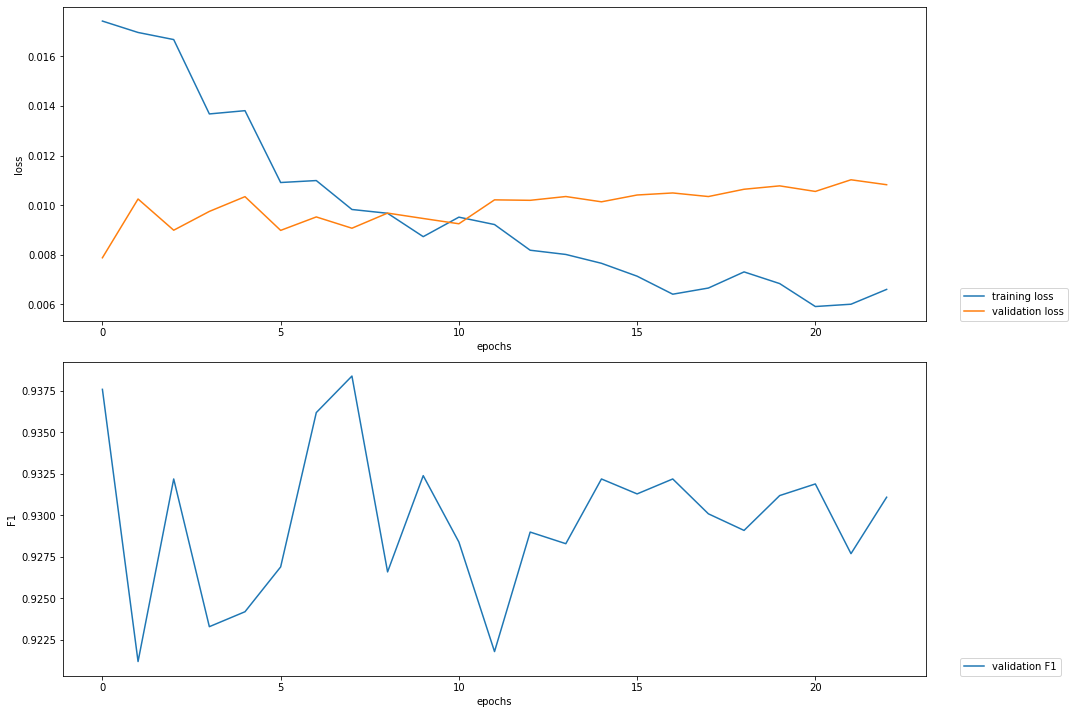

The graph above is a result of HunFlair. After running for more than 20 epochs, the HunFlair model manages to acheive an F1-score of roughly 94.83 on the evaluation set of NCBI. This is a very good performance, considering we are using the pre-trained weights, and the time it takes to fine-tune the model is relatively short (almost half an hour) and the whole process is fairly straightforward. But, on the other hand, using BioBERT on the same corpus, for a much shorter time $(<18 min)$ , we mananged to acheive an F1-score (on evaluation set) of 97.46, with only two epochs. This implies that NER with BioBERT on NCBI is much faster and the results are much better than the rest of the competitors, including here HunFlair. \\
- The HunFlair model was based on the tutorial from their official github repository: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_7_TRAINING_A_MODEL.md \\
- To run BioBERT with pre-trained word embeddings, we followed the paper from the DMIS Lab https://academic.oup.com/bioinformatics/article/36/4/1234/5566506?login=false. Their offical github reposiory has a readme file which explains how to use BioBERT in a python-supporting environment. \\
Below is the coding part of the validation.

In [ ]:
""" We start with BioBERT (Background):
    The authors of BioBERT have used the BERT (base) model which has been
    pre-trained on Wikipedia (English) and BooksCorpus. BioBERT (the last v
    ersion v1.1) has been trained on PubMED for 1 million steps. 8 NVIDIA V100 
    (32 GB) were used, with a fixed sequence length of 512 and mini-batches of 
    192. For fine-tuning, they have used a single GPU, and the sizes of the mini
    batches were much smaller (up to 64), while the learning rate was between 
    [5e-5, 1e-5]. It took +20 epochs to fine-tune BioBERT on NER Datasets.
"""
# Install transformers (used for any BERT-based lib)
!pip install transformers==3.0.0
# Install seqeval - used for evaluating sequence labelling
!pip install seqeval
# Clone github repo: includes pre-trained values and model definitions
!git clone https://github.com/dmis-lab/biobert-pytorch
# Download(temporary) the datasets for NER, later we pick NCBI
! /content/biobert-pytorch/download.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 754 kB 41.1 MB/s 
     |████████████████████████████████| 3.0 MB 62.1 MB/s 
     |████████████████████████████████| 880 kB 49.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=9fa95f3f4665bc830e9c19b2bb505dce3b202dce4a7e0cb4635230a90558f12b
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers-0.13.2:
      Successfully uninstalled tokenizers-0.13.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.25.1
    Uninstalling transformers-4.25.1:
      Successfully uninstalled transformers-4.25.1
ERROR: pip's dependency resolver does not currently take into account all the pa

In [ ]:
# Now we pre-process data
# Here wo load the training data 
# !/bin/bash

!echo "***** ""Preprocessing Start"" *****"
!DATA_DIR=./content/datasets/NER/NCBI-disease/  #select NCBI

# temporary save pre-trained weights 
!cat /content/datasets/NER/NCBI-disease//train.tsv | tr '\t' ' ' > /content/datasets/NER/NCBI-disease//train.txt.tmp
!cat /content/datasets/NER/NCBI-disease//devel.tsv | tr '\t' ' ' > /content/datasets/NER/NCBI-disease//devel.txt.tmp
!cat /content/datasets/NER/NCBI-disease//train_dev.tsv | tr '\t' ' ' > /content/datasets/NER/NCBI-disease//train_dev.txt.tmp
!cat /content/datasets/NER/NCBI-disease//test.tsv | tr '\t' ' ' > /content/datasets/NER/NCBI-disease//test.txt.tmp
!echo "Saved data"

# Preprocess for BERT-based models
# These values are results of pre-training on a huge dataset  (BERT + pubmed 1.1)
!python /content/biobert-pytorch/named-entity-recognition/scripts/preprocess.py /content/datasets/NER/NCBI-disease//train.txt.tmp bert-base-cased 128 > /content/datasets/NER/NCBI-disease//train.txt
!python /content/biobert-pytorch/named-entity-recognition/scripts/preprocess.py /content/datasets/NER/NCBI-disease//devel.txt.tmp bert-base-cased 128 > /content/datasets/NER/NCBI-disease//devel.txt
!python /content/biobert-pytorch/named-entity-recognition/scripts/preprocess.py /content/datasets/NER/NCBI-disease//train_dev.txt.tmp bert-base-cased 128 > /content/datasets/NER/NCBI-disease//train_dev.txt
!python /content/biobert-pytorch/named-entity-recognition/scripts/preprocess.py /content/datasets/NER/NCBI-disease//test.txt.tmp bert-base-cased 128 > /content/datasets/NER/NCBI-disease//test.txt
!cat /content/datasets/NER/NCBI-disease//train.txt /content/datasets/NER/NCBI-disease//devel.txt /content/datasets/NER/NCBI-disease//test.txt | cut -d " " -f 2 | grep -v "^$"| sort | uniq > /content/datasets/NER/NCBI-disease//labels.txt
!echo "***** " " Preprocessing Done *****"


***** Preprocessing Start *****
Saved data
Downloading: 100% 433/433 [00:00<00:00, 295kB/s]
Downloading: 100% 213k/213k [00:00<00:00, 239kB/s]
*****   Preprocessing Done *****


In [ ]:
# Method which manages to fine-tune BioBERT
# We can change max_sequence_length, the batch size, the number of epochs etc..

# For this implementation, we have used a batch size of 32, and trained on 
# three epochs. Use GPU if possible. 

def fine_tune_biobert():
  !export SAVE_DIR=./content/output
  !export DATA_DIR=./content/datasets/NER
  
  # Based on https://github.com/dmis-lab/biobert-pytorch#example
  # The example shows how to run any model with pytorch
  
  !python /content/biobert-pytorch/named-entity-recognition/run_ner.py \
      --data_dir /content/datasets/NER/NCBI-disease \
      --labels /content/datasets/NER/NCBI-disease/labels.txt \
      --model_name_or_path dmis-lab/biobert-base-cased-v1.1 \
      --output_dir /content/output/NER \
      --max_seq_length 192\
      --num_train_epochs 1\
      --per_device_train_batch_size 32 \
      --save_steps 1000\
      --seed 1 \
      --do_train \
      --do_eval \
      --do_predict \
      --overwrite_output_dir

In [ ]:
# Now we fine-tuned the model
# Call the function to 
fine_tune_biobert()

- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch:   0% 0/5 [00:00<?, ?it/s]
Iteration:   0% 0/199 [00:00<?, ?it/s]
Iteration:   1% 1/199 [00:01<05:32,  1.68s/it]
Iteration:   1% 2/199 [00:02<03:56,  1.20s/it]
Iteration:   2% 3/199 [00:03<03:24,  1.05s/it]
Iteration:   2% 4/199 [00:04<03:09,  1.03it/s]
Iteration:   3% 5/199 [00:05<03:00,  1.07it/s]
Iteration:   3% 6/199 [00:05<02:55,  1.10it/s]
Iteration:   4% 7/199 [00:06<02:51,  1.12it/s]
I

In [ ]:
# We can check how BioBERT manages to correctly tag diseases 
text = "/content/output/NER/test_predictions.txt"
with open(text, "r") as file1:
  print(file1.readlines())

['Clustering O\n', 'of O\n', 'missense O\n', 'mutations O\n', 'in O\n', 'the O\n', 'ataxia B\n', '- I\n', 'telangiectasia I\n', 'gene O\n', 'in O\n', 'a O\n', 'sporadic B\n', 'T I\n', '- I\n', 'cell I\n', 'leukaemia I\n', '. O\n', '\n', 'Ataxia B\n', '- I\n', 'telangiectasia I\n', '( O\n', 'A B\n', '- I\n', 'T I\n', ') O\n', 'is O\n', 'a O\n', 'recessive B\n', 'multi I\n', '- I\n', 'system I\n', 'disorder I\n', 'caused O\n', 'by O\n', 'mutations O\n', 'in O\n', 'the O\n', 'ATM O\n', 'gene O\n', 'at O\n', '11q22 O\n', '- O\n', 'q23 O\n', '( O\n', 'ref O\n', '. O\n', '3 O\n', ') O\n', '. O\n', '\n', 'The O\n', 'risk O\n', 'of O\n', 'cancer B\n', ', O\n', 'especially O\n', 'lymphoid B\n', 'neoplasias I\n', ', O\n', 'is O\n', 'substantially O\n', 'elevated O\n', 'in O\n', 'A B\n', '- I\n', 'T I\n', 'patients O\n', 'and O\n', 'has O\n', 'long O\n', 'been O\n', 'associated O\n', 'with O\n', 'chromosomal O\n', 'instability O\n', '. O\n', '\n', 'By O\n', 'analysing O\n', 'tumour B\n', 'DNA O\n

In [ ]:
# Now we retrive the results from the model
# Select eval or test

def get_f1_score():
  eval_data = "/content/output/NER/eval_results.txt"
  with open(eval_data, "r") as file1:
        return float(file1.readlines()[3].replace("eval_f1 = ", ""))

In [ ]:
print(get_f1_score())

0.9974619289340101


In [ ]:
""" Now we move on to evaluating the HunFlair model.
    Again, we use pre-computed weights, and fine tune on NCBI dataset.
"""
# Install flair, scispacy (for tokenized biomedical text)
%pip install flair
%pip install scispacy==0.2.5
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_sm-0.2.5.tar.gz
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!python3 -m spacy download en_core_web_sm

In [ ]:
# Based on the 7th tutorial from the official HunFlair repository, we fine-tune
# our own version of HunFlair NER model. 
# we begin by loading the corpus for the NCBI disease
# it comes with flair, so there is no need to import it from elsewhere
# NOTE-restart runtime
import flair.datasets
corpus = flair.datasets.NCBI_DISEASE()

# we make use of the pre-trained values for sequence tagging
from flair.models import SequenceTagger
tagger: SequenceTagger = SequenceTagger.load("hunflair-disease")

# Now we try to setup the model trainer : we pass the pre-trained tagger
# and the NCBI disease as corpus
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# Now we do the following to fine tune on the dataset
trainer.train(
    # pass pre-trained tagger
    base_path="taggers/hunflair-disease-finetuned-ncbi",
    train_with_dev=False,
    # perform a max nr of 20 epochs
    max_epochs=20,
    # a learning rate of 0.1 proved to be fast and accurate
    learning_rate=0.1,
    # set batch size as in the BioBERT model
    mini_batch_size=32
)

2022-12-17 20:49:02,986 https://www.ncbi.nlm.nih.gov/CBBresearch/Dogan/DISEASE/NCBItrainset_corpus.zip not found in cache, downloading to /tmp/tmpurmjndzs


100%|██████████| 324523/324523 [00:00<00:00, 385844.13B/s]

2022-12-17 20:49:04,765 copying /tmp/tmpurmjndzs to cache at /root/.flair/datasets/ncbi_disease/original/NCBItrainset_corpus.zip
2022-12-17 20:49:04,769 removing temp file /tmp/tmpurmjndzs


2022-12-17 20:49:05,704 https://www.ncbi.nlm.nih.gov/CBBresearch/Dogan/DISEASE/NCBIdevelopset_corpus.zip not found in cache, downloading to /tmp/tmp1vmdjz3b


100%|██████████| 57666/57666 [00:00<00:00, 132625.00B/s]

2022-12-17 20:49:07,143 copying /tmp/tmp1vmdjz3b to cache at /root/.flair/datasets/ncbi_disease/original/NCBIdevelopset_corpus.zip
2022-12-17 20:49:07,144 removing temp file /tmp/tmp1vmdjz3b


2022-12-17 20:49:08,029 https://www.ncbi.nlm.nih.gov/CBBresearch/Dogan/DISEASE/NCBItestset_corpus.zip not found in cache, downloading to /tmp/tmpzc8a7rrn


100%|██████████| 60234/60234 [00:00<00:00, 141391.79B/s]

2022-12-17 20:49:09,412 copying /tmp/tmpzc8a7rrn to cache at /root/.flair/datasets/ncbi_disease/original/NCBItestset_corpus.zip
2022-12-17 20:49:09,413 removing temp file /tmp/tmpzc8a7rrn



Converting to CoNLL: 100%|██████████| 100/100 [00:04<00:00, 24.12it/s]

2022-12-17 20:49:43,825 Reading data from /root/.flair/datasets/ncbi_disease
2022-12-17 20:49:43,827 Train: /root/.flair/datasets/ncbi_disease/SciSpacySentenceSplitter_core_sci_sm_0.2.5_SciSpacyTokenizer_core_sci_sm_0.2.5_train.conll
2022-12-17 20:49:43,830 Dev: /root/.flair/datasets/ncbi_disease/SciSpacySentenceSplitter_core_sci_sm_0.2.5_SciSpacyTokenizer_core_sci_sm_0.2.5_dev.conll
2022-12-17 20:49:43,832 Test: /root/.flair/datasets/ncbi_disease/SciSpacySentenceSplitter_core_sci_sm_0.2.5_SciSpacyTokenizer_core_sci_sm_0.2.5_test.conll


2022-12-17 20:49:48,124 https://nlp.informatik.hu-berlin.de/resources/models/hunflair_allcorpus_models/huner-disease/hunflair-disease-full-v1.0.pt not found in cache, downloading to /tmp/tmp9fkn31u0


100%|██████████| 1104886193/1104886193 [01:23<00:00, 13254606.24B/s]

2022-12-17 20:51:12,166 copying /tmp/tmp9fkn31u0 to cache at /root/.flair/models/hunflair-disease-full-v1.0.pt


2022-12-17 20:51:16,168 removing temp file /tmp/tmp9fkn31u0
2022-12-17 20:51:16,318 loading file /root/.flair/models/hunflair-disease-full-v1.0.pt
2022-12-17 20:51:22,151 SequenceTagger predicts: Dictionary with 8 tags: <unk>, O, B-Disease, E-Disease, I-Disease, S-Disease, <START>, <STOP>
2022-12-17 20:51:32,299 ----------------------------------------------------------------------------------------------------
2022-12-17 20:51:32,301 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('pubmed_pmc_wiki_sg_1M.gensim')
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=275, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(275, 100)
       

100%|██████████| 29/29 [00:17<00:00,  1.66it/s]

2022-12-17 20:53:17,048 Evaluating as a multi-label problem: False
2022-12-17 20:53:17,067 DEV : loss 0.007409469690173864 - f1-score (micro avg)  0.9421
2022-12-17 20:53:17,171 BAD EPOCHS (no improvement): 0
2022-12-17 20:53:17,173 saving best model


2022-12-17 20:53:22,742 ----------------------------------------------------------------------------------------------------
2022-12-17 20:53:25,327 epoch 2 - iter 16/167 - loss 0.01597294 - samples/sec: 198.44 - lr: 0.100000
2022-12-17 20:53:27,681 epoch 2 - iter 32/167 - loss 0.01469203 - samples/sec: 217.79 - lr: 0.100000
2022-12-17 20:53:30,042 epoch 2 - iter 48/167 - loss 0.01541860 - samples/sec: 217.21 - lr: 0.100000
2022-12-17 20:53:32,437 epoch 2 - iter 64/167 - loss 0.01582753 - samples/sec: 214.05 - lr: 0.100000
2022-12-17 20:53:34,814 epoch 2 - iter 80/167 - loss 0.01594744 - samples/sec: 215.71 - lr: 0.100000
2022-12-17 20:53:37,444 epoch 2 - iter 96/167 - loss 0.01635063 - samples/sec: 194.95 - lr: 0.100000
2022-12-17 20:53:40,117 epoch 2 - iter 112/167 - loss 0.01611822 - samples/sec: 191.73 - lr: 0.100000
2022-12-17 20:53:42,396 epoch 2 - iter 128/167 - loss 0.01588531 - samples/sec: 225.01 - lr: 0.100000
2022-12-17 20:53:44,930 epoch 2 - iter 144/167 - loss 0.01560190 

100%|██████████| 29/29 [00:05<00:00,  5.36it/s]

2022-12-17 20:53:53,796 Evaluating as a multi-label problem: False
2022-12-17 20:53:53,811 DEV : loss 0.007528150454163551 - f1-score (micro avg)  0.9483
2022-12-17 20:53:53,918 BAD EPOCHS (no improvement): 0
2022-12-17 20:53:53,922 saving best model


2022-12-17 20:53:59,290 ----------------------------------------------------------------------------------------------------
2022-12-17 20:54:01,742 epoch 3 - iter 16/167 - loss 0.01556645 - samples/sec: 209.22 - lr: 0.100000
2022-12-17 20:54:04,251 epoch 3 - iter 32/167 - loss 0.01513477 - samples/sec: 204.39 - lr: 0.100000
2022-12-17 20:54:06,797 epoch 3 - iter 48/167 - loss 0.01484916 - samples/sec: 201.32 - lr: 0.100000
2022-12-17 20:54:09,025 epoch 3 - iter 64/167 - loss 0.01526858 - samples/sec: 230.11 - lr: 0.100000
2022-12-17 20:54:11,502 epoch 3 - iter 80/167 - loss 0.01533226 - samples/sec: 206.97 - lr: 0.100000
2022-12-17 20:54:13,725 epoch 3 - iter 96/167 - loss 0.01565996 - samples/sec: 230.66 - lr: 0.100000
2022-12-17 20:54:16,044 epoch 3 - iter 112/167 - loss 0.01582110 - samples/sec: 221.07 - lr: 0.100000
2022-12-17 20:54:18,762 epoch 3 - iter 128/167 - loss 0.01535832 - samples/sec: 188.60 - lr: 0.100000
2022-12-17 20:54:21,068 epoch 3 - iter 144/167 - loss 0.01514518 

100%|██████████| 29/29 [00:05<00:00,  5.39it/s]

2022-12-17 20:54:30,416 Evaluating as a multi-label problem: False
2022-12-17 20:54:30,433 DEV : loss 0.008252820000052452 - f1-score (micro avg)  0.9323
2022-12-17 20:54:30,537 BAD EPOCHS (no improvement): 1
2022-12-17 20:54:30,539 ----------------------------------------------------------------------------------------------------


2022-12-17 20:54:33,024 epoch 4 - iter 16/167 - loss 0.01371778 - samples/sec: 206.62 - lr: 0.100000
2022-12-17 20:54:35,372 epoch 4 - iter 32/167 - loss 0.01557155 - samples/sec: 218.32 - lr: 0.100000
2022-12-17 20:54:37,763 epoch 4 - iter 48/167 - loss 0.01456697 - samples/sec: 214.42 - lr: 0.100000
2022-12-17 20:54:40,190 epoch 4 - iter 64/167 - loss 0.01388747 - samples/sec: 211.27 - lr: 0.100000
2022-12-17 20:54:42,897 epoch 4 - iter 80/167 - loss 0.01375651 - samples/sec: 189.43 - lr: 0.100000
2022-12-17 20:54:45,244 epoch 4 - iter 96/167 - loss 0.01385984 - samples/sec: 218.44 - lr: 0.100000
2022-12-17 20:54:47,562 epoch 4 - iter 112/167 - loss 0.01350406 - samples/sec: 221.21 - lr: 0.100000
2022-12-17 20:54:49,846 epoch 4 - iter 128/167 - loss 0.01382910 - samples/sec: 224.48 - lr: 0.100000
2022-12-17 20:54:52,376 epoch 4 - iter 144/167 - loss 0.01352437 - samples/sec: 202.62 - lr: 0.100000
2022-12-17 20:54:54,957 epoch 4 - iter 160/167 - loss 0.01370203 - samples/sec: 198.65 -

100%|██████████| 29/29 [00:06<00:00,  4.66it/s]

2022-12-17 20:55:02,202 Evaluating as a multi-label problem: False
2022-12-17 20:55:02,232 DEV : loss 0.009551115334033966 - f1-score (micro avg)  0.9212


2022-12-17 20:55:02,411 BAD EPOCHS (no improvement): 2
2022-12-17 20:55:02,414 ----------------------------------------------------------------------------------------------------
2022-12-17 20:55:06,203 epoch 5 - iter 16/167 - loss 0.01285159 - samples/sec: 135.47 - lr: 0.100000
2022-12-17 20:55:09,276 epoch 5 - iter 32/167 - loss 0.01314509 - samples/sec: 166.76 - lr: 0.100000
2022-12-17 20:55:11,736 epoch 5 - iter 48/167 - loss 0.01329841 - samples/sec: 208.45 - lr: 0.100000
2022-12-17 20:55:14,017 epoch 5 - iter 64/167 - loss 0.01298615 - samples/sec: 224.75 - lr: 0.100000
2022-12-17 20:55:16,488 epoch 5 - iter 80/167 - loss 0.01316682 - samples/sec: 207.54 - lr: 0.100000
2022-12-17 20:55:18,828 epoch 5 - iter 96/167 - loss 0.01304099 - samples/sec: 219.13 - lr: 0.100000
2022-12-17 20:55:21,154 epoch 5 - iter 112/167 - loss 0.01341373 - samples/sec: 220.39 - lr: 0.100000
2022-12-17 20:55:23,378 epoch 5 - iter 128/167 - loss 0.01356068 - samples/sec: 230.55 - lr: 0.100000
2022-12-17

100%|██████████| 29/29 [00:05<00:00,  5.36it/s]

2022-12-17 20:55:34,810 Evaluating as a multi-label problem: False
2022-12-17 20:55:34,825 DEV : loss 0.008876693435013294 - f1-score (micro avg)  0.9369
2022-12-17 20:55:34,933 BAD EPOCHS (no improvement): 3
2022-12-17 20:55:34,935 ----------------------------------------------------------------------------------------------------


2022-12-17 20:55:37,478 epoch 6 - iter 16/167 - loss 0.01161735 - samples/sec: 201.81 - lr: 0.100000
2022-12-17 20:55:39,868 epoch 6 - iter 32/167 - loss 0.01087089 - samples/sec: 214.51 - lr: 0.100000
2022-12-17 20:55:42,455 epoch 6 - iter 48/167 - loss 0.01168073 - samples/sec: 198.22 - lr: 0.100000
2022-12-17 20:55:44,860 epoch 6 - iter 64/167 - loss 0.01160072 - samples/sec: 213.42 - lr: 0.100000
2022-12-17 20:55:47,285 epoch 6 - iter 80/167 - loss 0.01178459 - samples/sec: 211.46 - lr: 0.100000
2022-12-17 20:55:49,655 epoch 6 - iter 96/167 - loss 0.01245645 - samples/sec: 216.33 - lr: 0.100000
2022-12-17 20:55:51,977 epoch 6 - iter 112/167 - loss 0.01275044 - samples/sec: 220.73 - lr: 0.100000
2022-12-17 20:55:54,360 epoch 6 - iter 128/167 - loss 0.01277013 - samples/sec: 215.49 - lr: 0.100000
2022-12-17 20:55:56,752 epoch 6 - iter 144/167 - loss 0.01278361 - samples/sec: 214.28 - lr: 0.100000
2022-12-17 20:55:59,075 epoch 6 - iter 160/167 - loss 0.01267560 - samples/sec: 220.73 -

100%|██████████| 29/29 [00:06<00:00,  4.82it/s]

2022-12-17 20:56:06,192 Evaluating as a multi-label problem: False
2022-12-17 20:56:06,208 DEV : loss 0.00903832633048296 - f1-score (micro avg)  0.9341
2022-12-17 20:56:06,310 Epoch     6: reducing learning rate of group 0 to 5.0000e-02.
2022-12-17 20:56:06,312 BAD EPOCHS (no improvement): 4
2022-12-17 20:56:06,314 ----------------------------------------------------------------------------------------------------


2022-12-17 20:56:08,946 epoch 7 - iter 16/167 - loss 0.01282992 - samples/sec: 195.05 - lr: 0.050000
2022-12-17 20:56:11,316 epoch 7 - iter 32/167 - loss 0.01273631 - samples/sec: 216.45 - lr: 0.050000
2022-12-17 20:56:13,932 epoch 7 - iter 48/167 - loss 0.01207820 - samples/sec: 195.95 - lr: 0.050000
2022-12-17 20:56:16,331 epoch 7 - iter 64/167 - loss 0.01178762 - samples/sec: 213.77 - lr: 0.050000
2022-12-17 20:56:18,605 epoch 7 - iter 80/167 - loss 0.01189710 - samples/sec: 225.43 - lr: 0.050000
2022-12-17 20:56:21,068 epoch 7 - iter 96/167 - loss 0.01132504 - samples/sec: 208.17 - lr: 0.050000
2022-12-17 20:56:23,441 epoch 7 - iter 112/167 - loss 0.01111583 - samples/sec: 216.02 - lr: 0.050000
2022-12-17 20:56:25,758 epoch 7 - iter 128/167 - loss 0.01122595 - samples/sec: 221.32 - lr: 0.050000
2022-12-17 20:56:28,144 epoch 7 - iter 144/167 - loss 0.01120944 - samples/sec: 214.87 - lr: 0.050000
2022-12-17 20:56:30,646 epoch 7 - iter 160/167 - loss 0.01105079 - samples/sec: 204.87 -

100%|██████████| 29/29 [00:05<00:00,  5.35it/s]

2022-12-17 20:56:37,061 Evaluating as a multi-label problem: False
2022-12-17 20:56:37,078 DEV : loss 0.009110050275921822 - f1-score (micro avg)  0.9311
2022-12-17 20:56:37,182 BAD EPOCHS (no improvement): 1
2022-12-17 20:56:37,184 ----------------------------------------------------------------------------------------------------


2022-12-17 20:56:39,593 epoch 8 - iter 16/167 - loss 0.00870259 - samples/sec: 213.36 - lr: 0.050000
2022-12-17 20:56:42,123 epoch 8 - iter 32/167 - loss 0.01006320 - samples/sec: 202.58 - lr: 0.050000
2022-12-17 20:56:44,544 epoch 8 - iter 48/167 - loss 0.01027393 - samples/sec: 211.77 - lr: 0.050000
2022-12-17 20:56:46,970 epoch 8 - iter 64/167 - loss 0.01049530 - samples/sec: 211.49 - lr: 0.050000
2022-12-17 20:56:49,255 epoch 8 - iter 80/167 - loss 0.01043677 - samples/sec: 224.34 - lr: 0.050000
2022-12-17 20:56:51,589 epoch 8 - iter 96/167 - loss 0.01058960 - samples/sec: 219.65 - lr: 0.050000
2022-12-17 20:56:54,053 epoch 8 - iter 112/167 - loss 0.01051131 - samples/sec: 208.05 - lr: 0.050000
2022-12-17 20:56:56,640 epoch 8 - iter 128/167 - loss 0.01047892 - samples/sec: 198.19 - lr: 0.050000
2022-12-17 20:56:59,032 epoch 8 - iter 144/167 - loss 0.01059090 - samples/sec: 214.37 - lr: 0.050000
2022-12-17 20:57:01,379 epoch 8 - iter 160/167 - loss 0.01062800 - samples/sec: 218.56 -

100%|██████████| 29/29 [00:06<00:00,  4.80it/s]

2022-12-17 20:57:08,435 Evaluating as a multi-label problem: False
2022-12-17 20:57:08,451 DEV : loss 0.008827594108879566 - f1-score (micro avg)  0.9279
2022-12-17 20:57:08,555 BAD EPOCHS (no improvement): 2
2022-12-17 20:57:08,557 ----------------------------------------------------------------------------------------------------


2022-12-17 20:57:11,143 epoch 9 - iter 16/167 - loss 0.00797999 - samples/sec: 198.52 - lr: 0.050000
2022-12-17 20:57:13,457 epoch 9 - iter 32/167 - loss 0.00893084 - samples/sec: 221.60 - lr: 0.050000
2022-12-17 20:57:15,744 epoch 9 - iter 48/167 - loss 0.00873221 - samples/sec: 224.36 - lr: 0.050000
2022-12-17 20:57:18,374 epoch 9 - iter 64/167 - loss 0.00919308 - samples/sec: 194.91 - lr: 0.050000
2022-12-17 20:57:20,877 epoch 9 - iter 80/167 - loss 0.00931258 - samples/sec: 204.81 - lr: 0.050000
2022-12-17 20:57:23,183 epoch 9 - iter 96/167 - loss 0.00923941 - samples/sec: 222.36 - lr: 0.050000
2022-12-17 20:57:25,602 epoch 9 - iter 112/167 - loss 0.00958869 - samples/sec: 211.98 - lr: 0.050000
2022-12-17 20:57:28,025 epoch 9 - iter 128/167 - loss 0.00963862 - samples/sec: 211.62 - lr: 0.050000
2022-12-17 20:57:30,279 epoch 9 - iter 144/167 - loss 0.00956938 - samples/sec: 227.58 - lr: 0.050000
2022-12-17 20:57:32,665 epoch 9 - iter 160/167 - loss 0.00948141 - samples/sec: 214.94 -

100%|██████████| 29/29 [00:05<00:00,  5.34it/s]

2022-12-17 20:57:39,108 Evaluating as a multi-label problem: False
2022-12-17 20:57:39,125 DEV : loss 0.009397473186254501 - f1-score (micro avg)  0.9315
2022-12-17 20:57:39,228 BAD EPOCHS (no improvement): 3
2022-12-17 20:57:39,230 ----------------------------------------------------------------------------------------------------


2022-12-17 20:57:41,743 epoch 10 - iter 16/167 - loss 0.00915036 - samples/sec: 204.31 - lr: 0.050000
2022-12-17 20:57:44,449 epoch 10 - iter 32/167 - loss 0.00900319 - samples/sec: 189.42 - lr: 0.050000
2022-12-17 20:57:47,831 epoch 10 - iter 48/167 - loss 0.00946993 - samples/sec: 151.63 - lr: 0.050000
2022-12-17 20:57:50,623 epoch 10 - iter 64/167 - loss 0.00954925 - samples/sec: 183.83 - lr: 0.050000
2022-12-17 20:57:52,976 epoch 10 - iter 80/167 - loss 0.00934399 - samples/sec: 217.87 - lr: 0.050000
2022-12-17 20:57:55,503 epoch 10 - iter 96/167 - loss 0.00922181 - samples/sec: 203.04 - lr: 0.050000
2022-12-17 20:57:57,746 epoch 10 - iter 112/167 - loss 0.00934676 - samples/sec: 228.54 - lr: 0.050000
2022-12-17 20:58:00,161 epoch 10 - iter 128/167 - loss 0.00951057 - samples/sec: 212.28 - lr: 0.050000
2022-12-17 20:58:02,597 epoch 10 - iter 144/167 - loss 0.00931598 - samples/sec: 210.53 - lr: 0.050000
2022-12-17 20:58:04,961 epoch 10 - iter 160/167 - loss 0.00928547 - samples/sec

100%|██████████| 29/29 [00:05<00:00,  4.89it/s]

2022-12-17 20:58:11,922 Evaluating as a multi-label problem: False
2022-12-17 20:58:11,938 DEV : loss 0.01068252045661211 - f1-score (micro avg)  0.9223
2022-12-17 20:58:12,050 Epoch    10: reducing learning rate of group 0 to 2.5000e-02.
2022-12-17 20:58:12,052 BAD EPOCHS (no improvement): 4
2022-12-17 20:58:12,056 ----------------------------------------------------------------------------------------------------


2022-12-17 20:58:14,595 epoch 11 - iter 16/167 - loss 0.00801908 - samples/sec: 202.11 - lr: 0.025000
2022-12-17 20:58:17,014 epoch 11 - iter 32/167 - loss 0.00802751 - samples/sec: 212.23 - lr: 0.025000
2022-12-17 20:58:19,423 epoch 11 - iter 48/167 - loss 0.00876991 - samples/sec: 212.80 - lr: 0.025000
2022-12-17 20:58:21,646 epoch 11 - iter 64/167 - loss 0.00814201 - samples/sec: 230.69 - lr: 0.025000
2022-12-17 20:58:24,151 epoch 11 - iter 80/167 - loss 0.00810703 - samples/sec: 204.66 - lr: 0.025000
2022-12-17 20:58:26,616 epoch 11 - iter 96/167 - loss 0.00828403 - samples/sec: 207.95 - lr: 0.025000
2022-12-17 20:58:29,042 epoch 11 - iter 112/167 - loss 0.00828366 - samples/sec: 211.38 - lr: 0.025000
2022-12-17 20:58:31,533 epoch 11 - iter 128/167 - loss 0.00802232 - samples/sec: 205.74 - lr: 0.025000
2022-12-17 20:58:33,912 epoch 11 - iter 144/167 - loss 0.00808563 - samples/sec: 215.53 - lr: 0.025000
2022-12-17 20:58:36,382 epoch 11 - iter 160/167 - loss 0.00829990 - samples/sec

100%|██████████| 29/29 [00:05<00:00,  5.42it/s]

2022-12-17 20:58:42,695 Evaluating as a multi-label problem: False
2022-12-17 20:58:42,711 DEV : loss 0.009763161651790142 - f1-score (micro avg)  0.9296
2022-12-17 20:58:42,816 BAD EPOCHS (no improvement): 1
2022-12-17 20:58:42,818 ----------------------------------------------------------------------------------------------------


2022-12-17 20:58:45,525 epoch 12 - iter 16/167 - loss 0.00899102 - samples/sec: 189.72 - lr: 0.025000
2022-12-17 20:58:47,849 epoch 12 - iter 32/167 - loss 0.00883479 - samples/sec: 220.59 - lr: 0.025000
2022-12-17 20:58:50,313 epoch 12 - iter 48/167 - loss 0.00845778 - samples/sec: 208.07 - lr: 0.025000
2022-12-17 20:58:52,695 epoch 12 - iter 64/167 - loss 0.00835710 - samples/sec: 215.21 - lr: 0.025000
2022-12-17 20:58:55,085 epoch 12 - iter 80/167 - loss 0.00822764 - samples/sec: 214.52 - lr: 0.025000
2022-12-17 20:58:57,487 epoch 12 - iter 96/167 - loss 0.00843456 - samples/sec: 213.54 - lr: 0.025000
2022-12-17 20:58:59,954 epoch 12 - iter 112/167 - loss 0.00810383 - samples/sec: 207.77 - lr: 0.025000
2022-12-17 20:59:02,170 epoch 12 - iter 128/167 - loss 0.00829007 - samples/sec: 231.41 - lr: 0.025000
2022-12-17 20:59:04,570 epoch 12 - iter 144/167 - loss 0.00824591 - samples/sec: 213.69 - lr: 0.025000
2022-12-17 20:59:06,920 epoch 12 - iter 160/167 - loss 0.00806142 - samples/sec

100%|██████████| 29/29 [00:06<00:00,  4.79it/s]

2022-12-17 20:59:14,095 Evaluating as a multi-label problem: False
2022-12-17 20:59:14,113 DEV : loss 0.010791544802486897 - f1-score (micro avg)  0.9178


2022-12-17 20:59:14,224 BAD EPOCHS (no improvement): 2
2022-12-17 20:59:14,226 ----------------------------------------------------------------------------------------------------
2022-12-17 20:59:16,715 epoch 13 - iter 16/167 - loss 0.00559717 - samples/sec: 206.15 - lr: 0.025000
2022-12-17 20:59:19,132 epoch 13 - iter 32/167 - loss 0.00615967 - samples/sec: 212.10 - lr: 0.025000
2022-12-17 20:59:21,622 epoch 13 - iter 48/167 - loss 0.00716567 - samples/sec: 205.92 - lr: 0.025000
2022-12-17 20:59:23,886 epoch 13 - iter 64/167 - loss 0.00702093 - samples/sec: 226.44 - lr: 0.025000
2022-12-17 20:59:26,397 epoch 13 - iter 80/167 - loss 0.00702604 - samples/sec: 204.13 - lr: 0.025000
2022-12-17 20:59:28,677 epoch 13 - iter 96/167 - loss 0.00768896 - samples/sec: 224.88 - lr: 0.025000
2022-12-17 20:59:31,163 epoch 13 - iter 112/167 - loss 0.00782550 - samples/sec: 206.28 - lr: 0.025000
2022-12-17 20:59:33,548 epoch 13 - iter 128/167 - loss 0.00801607 - samples/sec: 215.04 - lr: 0.025000
20

100%|██████████| 29/29 [00:05<00:00,  5.35it/s]

2022-12-17 20:59:44,793 Evaluating as a multi-label problem: False
2022-12-17 20:59:44,808 DEV : loss 0.010015985928475857 - f1-score (micro avg)  0.9296
2022-12-17 20:59:44,922 BAD EPOCHS (no improvement): 3
2022-12-17 20:59:44,924 ----------------------------------------------------------------------------------------------------


2022-12-17 20:59:47,491 epoch 14 - iter 16/167 - loss 0.00816083 - samples/sec: 200.12 - lr: 0.025000
2022-12-17 20:59:50,084 epoch 14 - iter 32/167 - loss 0.00799451 - samples/sec: 197.74 - lr: 0.025000
2022-12-17 20:59:52,544 epoch 14 - iter 48/167 - loss 0.00738044 - samples/sec: 208.39 - lr: 0.025000
2022-12-17 20:59:55,028 epoch 14 - iter 64/167 - loss 0.00760868 - samples/sec: 206.49 - lr: 0.025000
2022-12-17 20:59:57,394 epoch 14 - iter 80/167 - loss 0.00744631 - samples/sec: 216.75 - lr: 0.025000
2022-12-17 20:59:59,833 epoch 14 - iter 96/167 - loss 0.00789899 - samples/sec: 210.20 - lr: 0.025000
2022-12-17 21:00:02,269 epoch 14 - iter 112/167 - loss 0.00797907 - samples/sec: 210.47 - lr: 0.025000
2022-12-17 21:00:04,650 epoch 14 - iter 128/167 - loss 0.00787658 - samples/sec: 215.39 - lr: 0.025000
2022-12-17 21:00:06,911 epoch 14 - iter 144/167 - loss 0.00801248 - samples/sec: 226.71 - lr: 0.025000
2022-12-17 21:00:09,274 epoch 14 - iter 160/167 - loss 0.00791510 - samples/sec

100%|██████████| 29/29 [00:06<00:00,  4.76it/s]

2022-12-17 21:00:16,380 Evaluating as a multi-label problem: False
2022-12-17 21:00:16,396 DEV : loss 0.010253874585032463 - f1-score (micro avg)  0.9237
2022-12-17 21:00:16,505 Epoch    14: reducing learning rate of group 0 to 1.2500e-02.
2022-12-17 21:00:16,507 BAD EPOCHS (no improvement): 4
2022-12-17 21:00:16,512 ----------------------------------------------------------------------------------------------------


2022-12-17 21:00:19,234 epoch 15 - iter 16/167 - loss 0.00845548 - samples/sec: 188.36 - lr: 0.012500
2022-12-17 21:00:21,650 epoch 15 - iter 32/167 - loss 0.00725794 - samples/sec: 212.18 - lr: 0.012500
2022-12-17 21:00:23,927 epoch 15 - iter 48/167 - loss 0.00717548 - samples/sec: 225.18 - lr: 0.012500
2022-12-17 21:00:26,374 epoch 15 - iter 64/167 - loss 0.00742351 - samples/sec: 209.53 - lr: 0.012500
2022-12-17 21:00:29,279 epoch 15 - iter 80/167 - loss 0.00737312 - samples/sec: 176.50 - lr: 0.012500
2022-12-17 21:00:32,791 epoch 15 - iter 96/167 - loss 0.00745497 - samples/sec: 146.02 - lr: 0.012500
2022-12-17 21:00:35,155 epoch 15 - iter 112/167 - loss 0.00731691 - samples/sec: 216.87 - lr: 0.012500
2022-12-17 21:00:37,442 epoch 15 - iter 128/167 - loss 0.00736233 - samples/sec: 224.32 - lr: 0.012500
2022-12-17 21:00:39,812 epoch 15 - iter 144/167 - loss 0.00749694 - samples/sec: 216.63 - lr: 0.012500
2022-12-17 21:00:42,354 epoch 15 - iter 160/167 - loss 0.00752078 - samples/sec

100%|██████████| 29/29 [00:05<00:00,  5.33it/s]

2022-12-17 21:00:48,844 Evaluating as a multi-label problem: False
2022-12-17 21:00:48,860 DEV : loss 0.00977195892482996 - f1-score (micro avg)  0.9266
2022-12-17 21:00:48,968 BAD EPOCHS (no improvement): 1
2022-12-17 21:00:48,970 ----------------------------------------------------------------------------------------------------


2022-12-17 21:00:51,437 epoch 16 - iter 16/167 - loss 0.00798279 - samples/sec: 208.23 - lr: 0.012500
2022-12-17 21:00:54,014 epoch 16 - iter 32/167 - loss 0.00729153 - samples/sec: 199.02 - lr: 0.012500
2022-12-17 21:00:56,295 epoch 16 - iter 48/167 - loss 0.00664426 - samples/sec: 224.81 - lr: 0.012500
2022-12-17 21:00:58,738 epoch 16 - iter 64/167 - loss 0.00680614 - samples/sec: 209.84 - lr: 0.012500
2022-12-17 21:01:01,098 epoch 16 - iter 80/167 - loss 0.00669429 - samples/sec: 217.32 - lr: 0.012500
2022-12-17 21:01:03,476 epoch 16 - iter 96/167 - loss 0.00672340 - samples/sec: 215.52 - lr: 0.012500
2022-12-17 21:01:05,889 epoch 16 - iter 112/167 - loss 0.00713115 - samples/sec: 212.46 - lr: 0.012500
2022-12-17 21:01:08,347 epoch 16 - iter 128/167 - loss 0.00694604 - samples/sec: 208.63 - lr: 0.012500
2022-12-17 21:01:10,689 epoch 16 - iter 144/167 - loss 0.00680202 - samples/sec: 218.85 - lr: 0.012500
2022-12-17 21:01:13,330 epoch 16 - iter 160/167 - loss 0.00690405 - samples/sec

100%|██████████| 29/29 [00:06<00:00,  4.77it/s]

2022-12-17 21:01:20,431 Evaluating as a multi-label problem: False
2022-12-17 21:01:20,448 DEV : loss 0.010068158619105816 - f1-score (micro avg)  0.9296
2022-12-17 21:01:20,553 BAD EPOCHS (no improvement): 2
2022-12-17 21:01:20,561 ----------------------------------------------------------------------------------------------------


2022-12-17 21:01:23,122 epoch 17 - iter 16/167 - loss 0.00647899 - samples/sec: 200.24 - lr: 0.012500
2022-12-17 21:01:25,671 epoch 17 - iter 32/167 - loss 0.00665258 - samples/sec: 201.13 - lr: 0.012500
2022-12-17 21:01:28,010 epoch 17 - iter 48/167 - loss 0.00643946 - samples/sec: 219.19 - lr: 0.012500
2022-12-17 21:01:30,339 epoch 17 - iter 64/167 - loss 0.00652831 - samples/sec: 220.16 - lr: 0.012500
2022-12-17 21:01:32,819 epoch 17 - iter 80/167 - loss 0.00632730 - samples/sec: 206.75 - lr: 0.012500
2022-12-17 21:01:35,294 epoch 17 - iter 96/167 - loss 0.00675153 - samples/sec: 207.12 - lr: 0.012500
2022-12-17 21:01:37,696 epoch 17 - iter 112/167 - loss 0.00660127 - samples/sec: 213.42 - lr: 0.012500
2022-12-17 21:01:40,130 epoch 17 - iter 128/167 - loss 0.00666018 - samples/sec: 210.66 - lr: 0.012500
2022-12-17 21:01:42,364 epoch 17 - iter 144/167 - loss 0.00673592 - samples/sec: 229.45 - lr: 0.012500
2022-12-17 21:01:44,711 epoch 17 - iter 160/167 - loss 0.00680218 - samples/sec

100%|██████████| 29/29 [00:05<00:00,  5.35it/s]

2022-12-17 21:01:51,231 Evaluating as a multi-label problem: False
2022-12-17 21:01:51,247 DEV : loss 0.010439942590892315 - f1-score (micro avg)  0.9253
2022-12-17 21:01:51,348 BAD EPOCHS (no improvement): 3
2022-12-17 21:01:51,350 ----------------------------------------------------------------------------------------------------


2022-12-17 21:01:53,822 epoch 18 - iter 16/167 - loss 0.00677756 - samples/sec: 207.88 - lr: 0.012500
2022-12-17 21:01:56,113 epoch 18 - iter 32/167 - loss 0.00745065 - samples/sec: 223.74 - lr: 0.012500
2022-12-17 21:01:58,626 epoch 18 - iter 48/167 - loss 0.00716014 - samples/sec: 204.00 - lr: 0.012500
2022-12-17 21:02:01,005 epoch 18 - iter 64/167 - loss 0.00743525 - samples/sec: 215.58 - lr: 0.012500
2022-12-17 21:02:03,584 epoch 18 - iter 80/167 - loss 0.00733738 - samples/sec: 198.88 - lr: 0.012500
2022-12-17 21:02:05,892 epoch 18 - iter 96/167 - loss 0.00702098 - samples/sec: 222.11 - lr: 0.012500
2022-12-17 21:02:08,269 epoch 18 - iter 112/167 - loss 0.00680162 - samples/sec: 215.75 - lr: 0.012500
2022-12-17 21:02:10,745 epoch 18 - iter 128/167 - loss 0.00675657 - samples/sec: 207.01 - lr: 0.012500
2022-12-17 21:02:13,093 epoch 18 - iter 144/167 - loss 0.00681894 - samples/sec: 218.40 - lr: 0.012500
2022-12-17 21:02:15,536 epoch 18 - iter 160/167 - loss 0.00694306 - samples/sec

100%|██████████| 29/29 [00:06<00:00,  4.82it/s]

2022-12-17 21:02:22,700 Evaluating as a multi-label problem: False
2022-12-17 21:02:22,718 DEV : loss 0.00984543189406395 - f1-score (micro avg)  0.9296
2022-12-17 21:02:22,825 Epoch    18: reducing learning rate of group 0 to 6.2500e-03.
2022-12-17 21:02:22,827 BAD EPOCHS (no improvement): 4
2022-12-17 21:02:22,830 ----------------------------------------------------------------------------------------------------


2022-12-17 21:02:25,378 epoch 19 - iter 16/167 - loss 0.00670056 - samples/sec: 201.47 - lr: 0.006250
2022-12-17 21:02:27,554 epoch 19 - iter 32/167 - loss 0.00641629 - samples/sec: 235.66 - lr: 0.006250
2022-12-17 21:02:30,067 epoch 19 - iter 48/167 - loss 0.00624073 - samples/sec: 203.97 - lr: 0.006250
2022-12-17 21:02:32,508 epoch 19 - iter 64/167 - loss 0.00628060 - samples/sec: 210.10 - lr: 0.006250
2022-12-17 21:02:34,844 epoch 19 - iter 80/167 - loss 0.00681536 - samples/sec: 219.47 - lr: 0.006250
2022-12-17 21:02:37,399 epoch 19 - iter 96/167 - loss 0.00669258 - samples/sec: 200.73 - lr: 0.006250
2022-12-17 21:02:39,610 epoch 19 - iter 112/167 - loss 0.00670284 - samples/sec: 231.93 - lr: 0.006250
2022-12-17 21:02:41,956 epoch 19 - iter 128/167 - loss 0.00677982 - samples/sec: 218.58 - lr: 0.006250
2022-12-17 21:02:44,382 epoch 19 - iter 144/167 - loss 0.00680377 - samples/sec: 211.44 - lr: 0.006250
2022-12-17 21:02:46,832 epoch 19 - iter 160/167 - loss 0.00673403 - samples/sec

100%|██████████| 29/29 [00:05<00:00,  5.36it/s]

2022-12-17 21:02:53,314 Evaluating as a multi-label problem: False
2022-12-17 21:02:53,330 DEV : loss 0.010070715099573135 - f1-score (micro avg)  0.9285
2022-12-17 21:02:53,440 BAD EPOCHS (no improvement): 1


2022-12-17 21:02:53,448 ----------------------------------------------------------------------------------------------------
2022-12-17 21:02:55,988 epoch 20 - iter 16/167 - loss 0.00675097 - samples/sec: 202.14 - lr: 0.006250
2022-12-17 21:02:58,327 epoch 20 - iter 32/167 - loss 0.00635370 - samples/sec: 219.19 - lr: 0.006250
2022-12-17 21:03:00,765 epoch 20 - iter 48/167 - loss 0.00606598 - samples/sec: 210.28 - lr: 0.006250
2022-12-17 21:03:03,207 epoch 20 - iter 64/167 - loss 0.00616831 - samples/sec: 209.98 - lr: 0.006250
2022-12-17 21:03:05,749 epoch 20 - iter 80/167 - loss 0.00667714 - samples/sec: 201.63 - lr: 0.006250
2022-12-17 21:03:08,077 epoch 20 - iter 96/167 - loss 0.00674153 - samples/sec: 220.32 - lr: 0.006250
2022-12-17 21:03:10,773 epoch 20 - iter 112/167 - loss 0.00655973 - samples/sec: 190.13 - lr: 0.006250
2022-12-17 21:03:14,381 epoch 20 - iter 128/167 - loss 0.00672575 - samples/sec: 142.20 - lr: 0.006250
2022-12-17 21:03:16,978 epoch 20 - iter 144/167 - loss 0.

100%|██████████| 29/29 [00:06<00:00,  4.77it/s]

2022-12-17 21:03:26,361 Evaluating as a multi-label problem: False
2022-12-17 21:03:26,379 DEV : loss 0.009979057125747204 - f1-score (micro avg)  0.9247
2022-12-17 21:03:26,489 BAD EPOCHS (no improvement): 2


2022-12-17 21:03:31,740 ----------------------------------------------------------------------------------------------------
2022-12-17 21:03:31,742 loading file taggers/hunflair-disease-finetuned-ncbi/best-model.pt
2022-12-17 21:03:38,840 SequenceTagger predicts: Dictionary with 8 tags: <unk>, O, B-Disease, E-Disease, I-Disease, S-Disease, <START>, <STOP>


100%|██████████| 29/29 [00:15<00:00,  1.85it/s]

2022-12-17 21:03:54,872 Evaluating as a multi-label problem: False
2022-12-17 21:03:54,888 0.931	0.9563	0.9435	0.893
2022-12-17 21:03:54,890 
Results:
- F-score (micro) 0.9435
- F-score (macro) 0.9435
- Accuracy 0.893

By class:
              precision    recall  f1-score   support

     Disease     0.9310    0.9563    0.9435       960

   micro avg     0.9310    0.9563    0.9435       960
   macro avg     0.9310    0.9563    0.9435       960
weighted avg     0.9310    0.9563    0.9435       960

2022-12-17 21:03:54,892 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9434737923946557,
 'dev_score_history': [0.9420654911838791,
  0.9482976040353089,
  0.9323213156230233,
  0.9211669770328988,
  0.9369482976040353,
  0.9340866290018832,
  0.931056293485136,
  0.9279393173198482,
  0.9314896291640479,
  0.9223057644110276,
  0.929559748427673,
  0.9177652228499686,
  0.929559748427673,
  0.9236545682102628,
  0.9265536723163842,
  0.9296482412060302,
  0.9252981795354676,
  0.9296482412060302,
  0.9284818067754078,
  0.9247176913425345],
 'train_loss_history': [0.01735576883608234,
  0.015938994566492157,
  0.01505430869079787,
  0.01387172837269196,
  0.013449035062720483,
  0.012544617097782032,
  0.011027709072187196,
  0.010551485506736472,
  0.00931666866039931,
  0.00925397969559221,
  0.008259440617259627,
  0.007972302802249868,
  0.00809818282997448,
  0.007858249567242738,
  0.0074568166305449225,
  0.0068721581979940705,
  0.006831451601553704,
  0.006861980632646551,
  0.0067521933991030545,
  0.006744830515133604],
 'dev_

In [ ]:
# after training the model, we store the best one (with 5 tags) 
model = SequenceTagger.load("/content/taggers/hunflair-disease-finetuned-ncbi/best-model.pt")

2022-12-17 21:04:01,561 loading file /content/taggers/hunflair-disease-finetuned-ncbi/best-model.pt
2022-12-17 21:04:08,000 SequenceTagger predicts: Dictionary with 8 tags: <unk>, O, B-Disease, E-Disease, I-Disease, S-Disease, <START>, <STOP>


2022-12-17 23:18:52,139 ----------------------------------------------------------------------------------------------------
2022-12-17 23:18:52,141 WARNING: No LOSS found for test split in this data.
2022-12-17 23:18:52,144 Are you sure you want to plot LOSS and not another value?
2022-12-17 23:18:52,145 ----------------------------------------------------------------------------------------------------
2022-12-17 23:18:52,172 ----------------------------------------------------------------------------------------------------
2022-12-17 23:18:52,173 WARNING: No F1 found for test split in this data.
2022-12-17 23:18:52,174 Are you sure you want to plot F1 and not another value?
2022-12-17 23:18:52,179 ----------------------------------------------------------------------------------------------------
2022-12-17 23:18:53,933 Loss and F1 plots are saved in /content/taggers/hunflair-disease-finetuned-ncbi/training.png


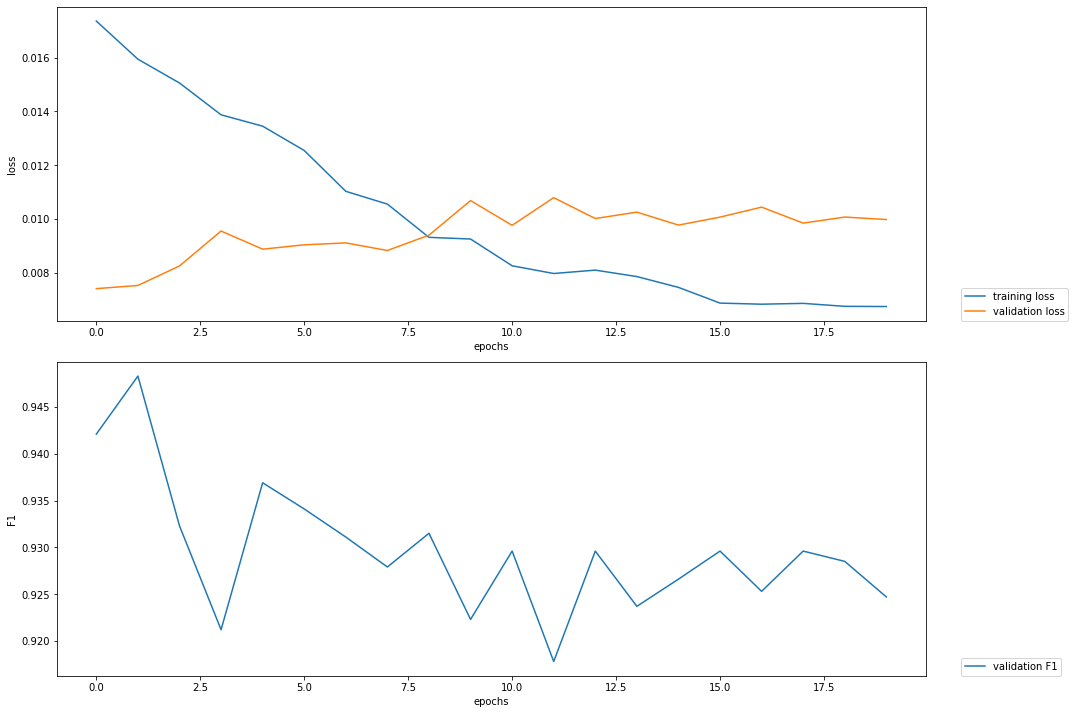

In [ ]:
# We can plot the f1-score, and the loss of training and validation
# import from flair
from flair.visual.training_curves import Plotter
# plot
plotter = Plotter()
plotter.plot_training_curves('/content/taggers/hunflair-disease-finetuned-ncbi/loss.tsv')

The HunFlair model that we trained is similar to what we have discussed in class for the big models: it might be able to memorize the input (we see that the loss becomes almost 0), but still, performs very good in unseen data. Anyhow, it is important to re-state that BioBERT outperforms the HunFlair's performance: it has a higher F1 score. 

## References

[1]	D. Nadeau and S. Sekine, “A survey of named entity recognition and classification,” Lingvisticae Investig., vol. 30, no. 1, pp. 3–26, Aug. 2007, 

[2] I. Zitouni, Natural language processing of semitic languages. 2014.

[3] J. Li, A. Sun, J. Han, and C. Li, “A survey on deep learning for named entity recognition,” IEEE Trans. Knowl. Data Eng., vol. 34, no. 1, pp. 50–70, 2020.

[4] H. Cho and H. Lee, “Biomedical named entity recognition using deep neural networks with contextual information,” BMC Bioinformatics, vol. 20, no. 1, pp. 1–11, 2019.

[5] Z. Zhang and A. L. P. Chen, “Biomedical Named Entity Recognition with the Combined Feature Attention and Fully-Shared Multi-Task Learning,” 2022.

[6]	M. Neumann, D. King, I. Beltagy, and W. Ammar, “ScispaCy: fast and robust models for biomedical natural language processing,” arXiv Prepr. arXiv1902.07669, 2019.

[7] https://github.com/covidgraph/documentation/issues/46

[8] L. Weber, J. Münchmeyer, T. Rocktäschel, M. Habibi, and U. Leser, “HUNER: improving biomedical NER with pretraining,” Bioinformatics, vol. 36, no. 1, pp. 295–302, 2020.

[9] L. Weber, M. Sänger, J. Münchmeyer, M. Habibi, U. Leser, and A. Akbik, “HunFlair: an easy-to-use tool for state-of-the-art biomedical named entity recognition,” Bioinformatics, vol. 37, no. 17, pp. 2792–2794, 2021.